In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
pip install pyswarms


--- 1. Initial Inspection ---

Converting columns ['mass', 'planet_radius', 'orbit_distance', 'eccentricity'] to numeric and replacing placeholders ['Not Found', 'Unknown', '', ' '] with NaN.

Data Info after numeric conversion attempt:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5862 entries, 0 to 5861
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5858 non-null   object 
 1   host_star_name    5862 non-null   object 
 2   url               5862 non-null   object 
 3   planet_type       5862 non-null   object 
 4   mass              5831 non-null   float64
 5   planet_radius     5841 non-null   float64
 6   orbital_period    5862 non-null   float64
 7   orbit_distance    5575 non-null   float64
 8   eccentricity      4753 non-null   float64
 9   discovery_method  5862 non-null   object 
 10  host_star_type    5862 non-null   object 
dtypes: float64(5), object(6)
memory usage: 

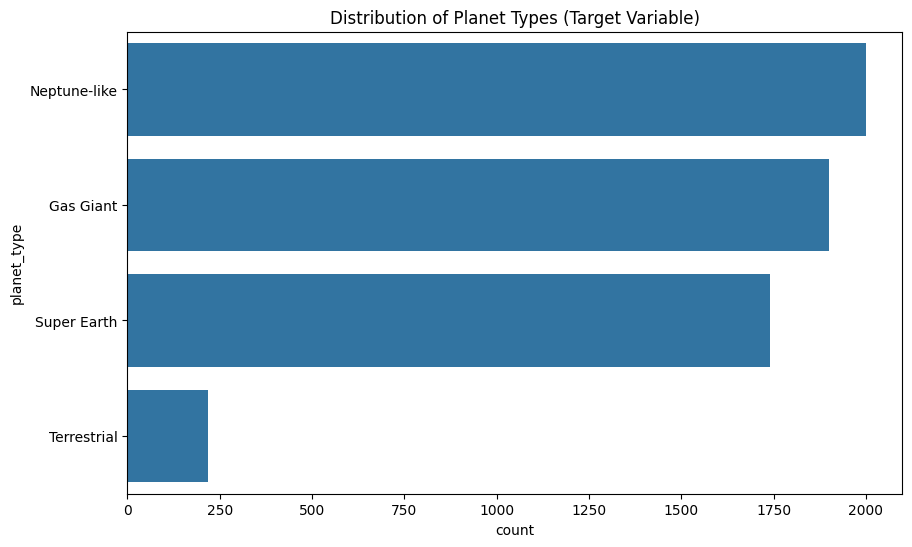


--- 4. Preprocessing ---

Shape of X_processed: (5855, 24)
Number of features after OHE: 24
Feature names: ['mass', 'planet_radius', 'orbital_period', 'orbit_distance', 'eccentricity', 'discovery_method_Astrometry', 'discovery_method_Disk Kinematics', 'discovery_method_Eclipse Timing Variations', 'discovery_method_Imaging', 'discovery_method_Microlensing']...

Target variable 'planet_type' encoded.
Number of unique classes: 4
Class mapping: {'Gas Giant': np.int64(0), 'Neptune-like': np.int64(1), 'Super Earth': np.int64(2), 'Terrestrial': np.int64(3)}

--- 5. Train Test Split ---
X_train_full shape: (4684, 24), y_train_full shape: (4684,)
X_test shape: (1171, 24), y_test shape: (1171,)

--- Phase 2: Building a baseline Neural Network for later optimization---

--- 6. Define the Neural Network Architecture ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- 7. Compile the Model ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,396 (5.45 KB)

 Trainable params: 1,396 (5.45 KB)

 Non-trainable params: 0 (0.00 B)


--- 8. Train the Model ---
Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4086 - loss: 1.2713 - val_accuracy: 0.7801 - val_loss: 0.7985
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7583 - loss: 0.7334 - val_accuracy: 0.8399 - val_loss: 0.5469
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8186 - loss: 0.5726 - val_accuracy: 0.8613 - val_loss: 0.4528
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8374 - loss: 0.4875 - val_accuracy: 0.8730 - val_loss: 0.3993
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8537 - loss: 0.4295 - val_accuracy: 0.8805 - val_loss: 0.3659
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8515 - loss: 0.4080 - val_accuracy: 0.8815 - val_loss: 0.3356
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8596 - loss: 0.3872 - val_accuracy: 0.8869 - val_loss: 0.3110
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8687 - lo

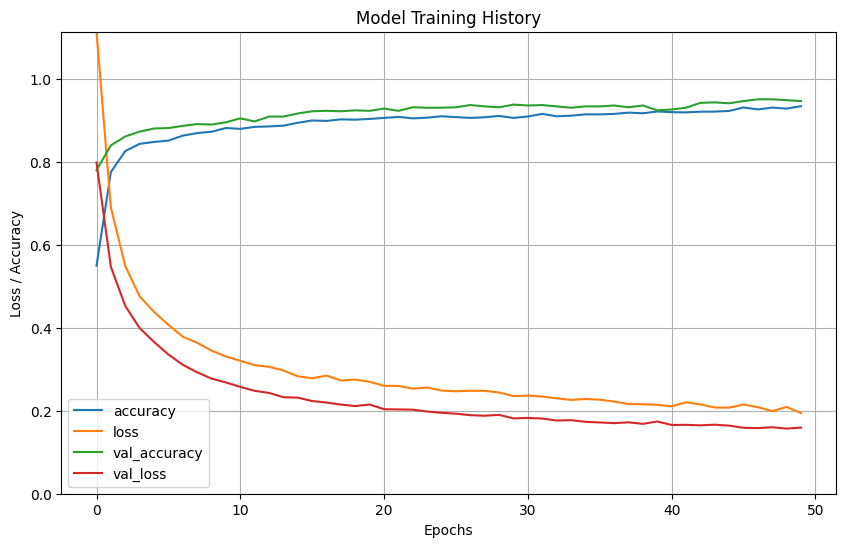


--- 9. Evaluate the Model ---

Test Loss: 0.2086
Test Accuracy: 0.9377
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

   Gas Giant       0.98      0.93      0.95       380
Neptune-like       0.95      0.93      0.94       400
 Super Earth       0.90      0.97      0.94       348
 Terrestrial       0.81      0.79      0.80        43

    accuracy                           0.94      1171
   macro avg       0.91      0.91      0.91      1171
weighted avg       0.94      0.94      0.94      1171



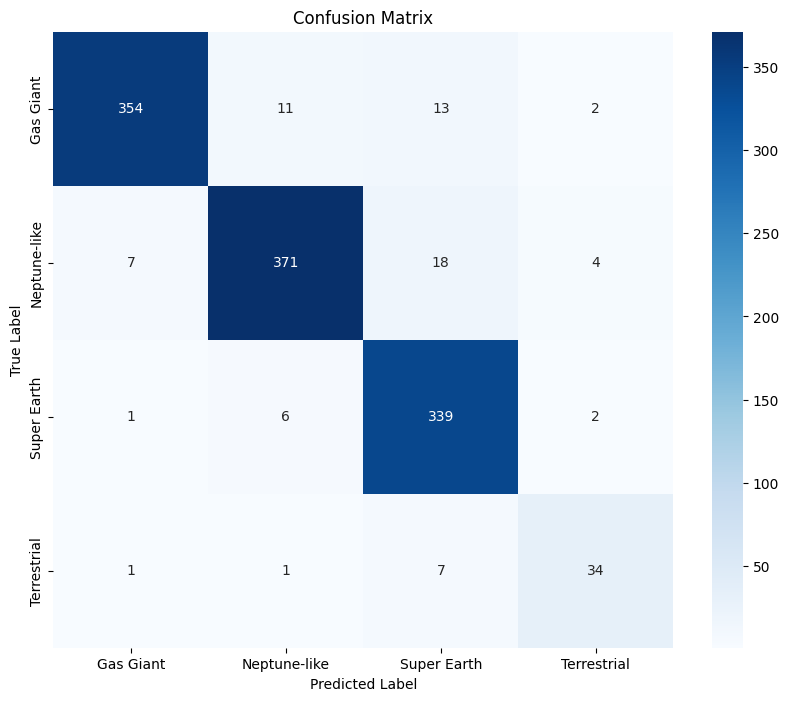

2025-05-06 20:41:15,162 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}



--- PSO Optimization ---
PSO training set size: (3513, 24)
PSO validation set size: (1171, 24)

Starting PSO with 10 particles for 10 iterations.


pyswarms.single.global_best:   0%|          |0/10

PSO Eval 1: N1=39, N2=55, DR=0.179, LR=0.00467, BS=58

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 -> Val Acc: 0.9419
PSO Eval 2: N1=18, N2=57, DR=0.418, LR=0.00343, BS=63 -> Val Acc: 0.9291
PSO Eval 3: N1=88, N2=19, DR=0.242, LR=0.00040, BS=21 -> Val Acc: 0.9189
PSO Eval 4: N1=122, N2=36, DR=0.485, LR=0.00989, BS=27 -> Val Acc: 0.9240
PSO Eval 5: N1=111, N2=44, DR=0.207, LR=0.00056, BS=40 -> Val Acc: 0.9214
PSO Eval 6: N1=77, N2=45, DR=0.410, LR=0.00826, BS=60 -> Val Acc: 0.9266
PSO Eval 7: N1=80, N2=61, DR=0.257, LR=0.00843, BS=35 -> Val Acc: 0.9522
PSO Eval 8: N1=37, N2=11, DR=0.057, LR=0.00536, BS=45 -> Val Acc: 0.9547
PSO Eval 9: N1=66, N2=17, DR=0.066, LR=0.00285, BS=60 -> Val Acc: 0.9505
PSO Eval 10: N1=100, N2=40, DR=0.442, LR=0.00062, BS=48

pyswarms.single.global_best:  10%|█         |1/10, best_cost=0.0453

 -> Val Acc: 0.9095
PSO Eval 11: N1=39, N2=44, DR=0.459, LR=0.00899, BS=58 -> Val Acc: 0.9308
PSO Eval 12: N1=23, N2=51, DR=0.215, LR=0.00285, BS=59 -> Val Acc: 0.9325
PSO Eval 13: N1=86, N2=17, DR=0.291, LR=0.00054, BS=24 -> Val Acc: 0.9155
PSO Eval 14: N1=114, N2=33, DR=0.470, LR=0.00413, BS=32 -> Val Acc: 0.9266
PSO Eval 15: N1=93, N2=38, DR=0.272, LR=0.00795, BS=41 -> Val Acc: 0.9641
PSO Eval 16: N1=66, N2=35, DR=0.241, LR=0.00121, BS=58 -> Val Acc: 0.9231
PSO Eval 17: N1=76, N2=57, DR=0.229, LR=0.00901, BS=36 -> Val Acc: 0.9590
PSO Eval 18: N1=37, N2=12, DR=0.500, LR=0.00252, BS=45 -> Val Acc: 0.9035
PSO Eval 19: N1=58, N2=17, DR=0.250, LR=0.00252, BS=58 -> Val Acc: 0.9300
PSO Eval 20: N1=84, N2=38, DR=0.242, LR=0.00233, BS=48

pyswarms.single.global_best:  20%|██        |2/10, best_cost=0.0359

 -> Val Acc: 0.9360
PSO Eval 21: N1=52, N2=36, DR=0.165, LR=0.00752, BS=53 -> Val Acc: 0.9436
PSO Eval 22: N1=42, N2=45, DR=0.440, LR=0.00260, BS=56 -> Val Acc: 0.9291
PSO Eval 23: N1=85, N2=21, DR=0.270, LR=0.00326, BS=29 -> Val Acc: 0.9308
PSO Eval 24: N1=103, N2=31, DR=0.368, LR=0.00637, BS=38 -> Val Acc: 0.9291
PSO Eval 25: N1=76, N2=33, DR=0.285, LR=0.00372, BS=42 -> Val Acc: 0.9564
PSO Eval 26: N1=62, N2=31, DR=0.095, LR=0.00125, BS=53 -> Val Acc: 0.9291
PSO Eval 27: N1=75, N2=48, DR=0.160, LR=0.00935, BS=37 -> Val Acc: 0.9607
PSO Eval 28: N1=54, N2=17, DR=0.324, LR=0.00088, BS=44 -> Val Acc: 0.9061
PSO Eval 29: N1=60, N2=18, DR=0.416, LR=0.00331, BS=57 -> Val Acc: 0.9317
PSO Eval 30: N1=71, N2=36, DR=0.427, LR=0.00155, BS=46

pyswarms.single.global_best:  30%|███       |3/10, best_cost=0.0359

 -> Val Acc: 0.9283
PSO Eval 31: N1=66, N2=29, DR=0.280, LR=0.00926, BS=49 -> Val Acc: 0.9266
PSO Eval 32: N1=66, N2=40, DR=0.190, LR=0.00759, BS=49 -> Val Acc: 0.9539
PSO Eval 33: N1=85, N2=27, DR=0.206, LR=0.00883, BS=34 -> Val Acc: 0.9291
PSO Eval 34: N1=91, N2=31, DR=0.217, LR=0.00246, BS=44 -> Val Acc: 0.9564
PSO Eval 35: N1=68, N2=29, DR=0.249, LR=0.00994, BS=43 -> Val Acc: 0.9505
PSO Eval 36: N1=67, N2=28, DR=0.399, LR=0.00559, BS=48 -> Val Acc: 0.9342
PSO Eval 37: N1=78, N2=40, DR=0.068, LR=0.00534, BS=39 -> Val Acc: 0.9291
PSO Eval 38: N1=74, N2=23, DR=0.461, LR=0.00600, BS=43 -> Val Acc: 0.9300
PSO Eval 39: N1=68, N2=23, DR=0.104, LR=0.00024, BS=56 -> Val Acc: 0.8702
PSO Eval 40: N1=67, N2=35, DR=0.493, LR=0.00453, BS=44

pyswarms.single.global_best:  40%|████      |4/10, best_cost=0.0359

 -> Val Acc: 0.9308
PSO Eval 41: N1=78, N2=27, DR=0.303, LR=0.00164, BS=44 -> Val Acc: 0.9266
PSO Eval 42: N1=94, N2=35, DR=0.389, LR=0.00319, BS=41 -> Val Acc: 0.9334
PSO Eval 43: N1=87, N2=32, DR=0.135, LR=0.00703, BS=38 -> Val Acc: 0.9616
PSO Eval 44: N1=80, N2=33, DR=0.050, LR=0.00937, BS=49 -> Val Acc: 0.9445
PSO Eval 45: N1=67, N2=28, DR=0.184, LR=0.00330, BS=42 -> Val Acc: 0.9317
PSO Eval 46: N1=78, N2=27, DR=0.191, LR=0.00500, BS=42 -> Val Acc: 0.9291
PSO Eval 47: N1=80, N2=34, DR=0.448, LR=0.00398, BS=40 -> Val Acc: 0.9334
PSO Eval 48: N1=93, N2=33, DR=0.461, LR=0.00981, BS=43 -> Val Acc: 0.9172
PSO Eval 49: N1=80, N2=28, DR=0.263, LR=0.00029, BS=54 -> Val Acc: 0.8676
PSO Eval 50: N1=71, N2=35, DR=0.361, LR=0.00735, BS=44

pyswarms.single.global_best:  50%|█████     |5/10, best_cost=0.0359

 -> Val Acc: 0.9308
PSO Eval 51: N1=88, N2=31, DR=0.246, LR=0.00260, BS=40 -> Val Acc: 0.9513
PSO Eval 52: N1=116, N2=30, DR=0.087, LR=0.00688, BS=37 -> Val Acc: 0.9539
PSO Eval 53: N1=89, N2=36, DR=0.498, LR=0.00167, BS=41 -> Val Acc: 0.9300
PSO Eval 54: N1=73, N2=35, DR=0.400, LR=0.00929, BS=51 -> Val Acc: 0.9308
PSO Eval 55: N1=74, N2=34, DR=0.130, LR=0.00640, BS=41 -> Val Acc: 0.9616
PSO Eval 56: N1=88, N2=27, DR=0.426, LR=0.00998, BS=38 -> Val Acc: 0.9325
PSO Eval 57: N1=80, N2=34, DR=0.157, LR=0.00118, BS=41 -> Val Acc: 0.9291
PSO Eval 58: N1=107, N2=35, DR=0.297, LR=0.00531, BS=42 -> Val Acc: 0.9308
PSO Eval 59: N1=91, N2=29, DR=0.327, LR=0.00550, BS=54 -> Val Acc: 0.9325
PSO Eval 60: N1=78, N2=36, DR=0.157, LR=0.00559, BS=44

pyswarms.single.global_best:  60%|██████    |6/10, best_cost=0.0359

 -> Val Acc: 0.9317
PSO Eval 61: N1=97, N2=35, DR=0.151, LR=0.00764, BS=36 -> Val Acc: 0.9530
PSO Eval 62: N1=127, N2=33, DR=0.249, LR=0.00069, BS=38 -> Val Acc: 0.9266
PSO Eval 63: N1=92, N2=39, DR=0.148, LR=0.00694, BS=44 -> Val Acc: 0.9650
PSO Eval 64: N1=77, N2=37, DR=0.252, LR=0.00548, BS=49 -> Val Acc: 0.9325
PSO Eval 65: N1=94, N2=41, DR=0.085, LR=0.00936, BS=40 -> Val Acc: 0.9573
PSO Eval 66: N1=88, N2=28, DR=0.170, LR=0.00956, BS=35 -> Val Acc: 0.9351
PSO Eval 67: N1=79, N2=36, DR=0.312, LR=0.00099, BS=41 -> Val Acc: 0.9249
PSO Eval 68: N1=108, N2=37, DR=0.480, LR=0.00736, BS=43 -> Val Acc: 0.9283
PSO Eval 69: N1=99, N2=27, DR=0.259, LR=0.00797, BS=54 -> Val Acc: 0.9300
PSO Eval 70: N1=88, N2=37, DR=0.442, LR=0.00528, BS=44

pyswarms.single.global_best:  70%|███████   |7/10, best_cost=0.035

 -> Val Acc: 0.9317
PSO Eval 71: N1=105, N2=40, DR=0.470, LR=0.00225, BS=34 -> Val Acc: 0.9300
PSO Eval 72: N1=125, N2=38, DR=0.377, LR=0.00950, BS=41 -> Val Acc: 0.9283
PSO Eval 73: N1=95, N2=41, DR=0.237, LR=0.00079, BS=47 -> Val Acc: 0.9206
PSO Eval 74: N1=82, N2=38, DR=0.066, LR=0.00522, BS=46 -> Val Acc: 0.9522
PSO Eval 75: N1=111, N2=47, DR=0.492, LR=0.00049, BS=40 -> Val Acc: 0.8992
PSO Eval 76: N1=89, N2=32, DR=0.341, LR=0.00497, BS=33 -> Val Acc: 0.9291
PSO Eval 77: N1=80, N2=40, DR=0.432, LR=0.00626, BS=41 -> Val Acc: 0.9428
PSO Eval 78: N1=91, N2=34, DR=0.497, LR=0.00890, BS=44 -> Val Acc: 0.9266
PSO Eval 79: N1=90, N2=27, DR=0.126, LR=0.00832, BS=52 -> Val Acc: 0.9564
PSO Eval 80: N1=98, N2=39, DR=0.101, LR=0.00090, BS=45

pyswarms.single.global_best:  80%|████████  |8/10, best_cost=0.035

 -> Val Acc: 0.9266
PSO Eval 81: N1=111, N2=42, DR=0.112, LR=0.00351, BS=34 -> Val Acc: 0.9505
PSO Eval 82: N1=92, N2=44, DR=0.410, LR=0.00458, BS=46 -> Val Acc: 0.9300
PSO Eval 83: N1=97, N2=43, DR=0.283, LR=0.00648, BS=48 -> Val Acc: 0.9283
PSO Eval 84: N1=91, N2=36, DR=0.375, LR=0.00188, BS=42 -> Val Acc: 0.9300
PSO Eval 85: N1=124, N2=50, DR=0.250, LR=0.00307, BS=42 -> Val Acc: 0.9274
PSO Eval 86: N1=90, N2=36, DR=0.451, LR=0.00879, BS=35 -> Val Acc: 0.9300
PSO Eval 87: N1=79, N2=44, DR=0.055, LR=0.00051, BS=41 -> Val Acc: 0.9197
PSO Eval 88: N1=65, N2=24, DR=0.325, LR=0.00218, BS=45 -> Val Acc: 0.9300
PSO Eval 89: N1=81, N2=28, DR=0.459, LR=0.00231, BS=50 -> Val Acc: 0.9283
PSO Eval 90: N1=102, N2=41, DR=0.243, LR=0.00768, BS=46

pyswarms.single.global_best:  90%|█████████ |9/10, best_cost=0.035

 -> Val Acc: 0.9547
PSO Eval 91: N1=108, N2=41, DR=0.212, LR=0.00538, BS=36 -> Val Acc: 0.9530
PSO Eval 92: N1=51, N2=48, DR=0.414, LR=0.00077, BS=51 -> Val Acc: 0.9120
PSO Eval 93: N1=96, N2=42, DR=0.257, LR=0.00277, BS=46 -> Val Acc: 0.9411
PSO Eval 94: N1=99, N2=33, DR=0.084, LR=0.00996, BS=40 -> Val Acc: 0.9402
PSO Eval 95: N1=123, N2=46, DR=0.427, LR=0.00624, BS=43 -> Val Acc: 0.9428
PSO Eval 96: N1=91, N2=39, DR=0.492, LR=0.00932, BS=39 -> Val Acc: 0.9283
PSO Eval 97: N1=80, N2=49, DR=0.161, LR=0.00735, BS=40 -> Val Acc: 0.9530
PSO Eval 98: N1=42, N2=14, DR=0.143, LR=0.00313, BS=46 -> Val Acc: 0.9325
PSO Eval 99: N1=78, N2=31, DR=0.181, LR=0.00565, BS=48 -> Val Acc: 0.9453
PSO Eval 100: N1=103, N2=41, DR=0.370, LR=0.00871, BS=47

pyswarms.single.global_best: 100%|██████████|10/10, best_cost=0.035
2025-05-06 20:58:00,647 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.035012781620025635, best pos: [9.24614157e+01 3.88533120e+01 1.47738928e-01 6.93579240e-03
 4.44380503e+01]


 -> Val Acc: 0.9274

--- PSO Optimization Finished ---
Best cost (1 - val_accuracy) from PSO: 0.0350
Best hyperparameters from PSO: [9.24614157e+01 3.88533120e+01 1.47738928e-01 6.93579240e-03
 4.44380503e+01]

Formatted Best Hyperparameters from PSO:
  Neurons L1: 92, Neurons L2: 39
  Dropout: 0.1477, LR: 0.006936, Batch Size: 44

--- Training Final Model with PSO-Optimized Hyperparameters ---


Model: "sequential_101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_303 (Dense)               │ (None, 92)             │         2,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_202 (Dropout)           │ (None, 92)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_304 (Dense)               │ (None, 39)             │         3,627 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_203 (Dropout)           │ (None, 39)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_305 (Dense)               │ (None, 4)              │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,087 (23.78 KB)

 Trainable params: 6,087 (23.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7266 - loss: 0.7764 - val_accuracy: 0.8911 - val_loss: 0.2809
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8882 - loss: 0.3183 - val_accuracy: 0.8879 - val_loss: 0.2616
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8987 - loss: 0.2824 - val_accuracy: 0.9157 - val_loss: 0.2009
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9013 - loss: 0.2657 - val_accuracy: 0.9039 - val_loss: 0.2029
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9025 - loss: 0.2787 - val_accuracy: 0.9221 - val_loss: 0.2001
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9177 - loss: 0.2134 - val_accuracy: 0.9402 - val_loss: 0.1732
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9158 - loss: 0.2203 - val_accuracy: 0.9338 - val_loss: 0.1708
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9317 - loss: 0.1964 - val_accuracy: 0.9520 - v

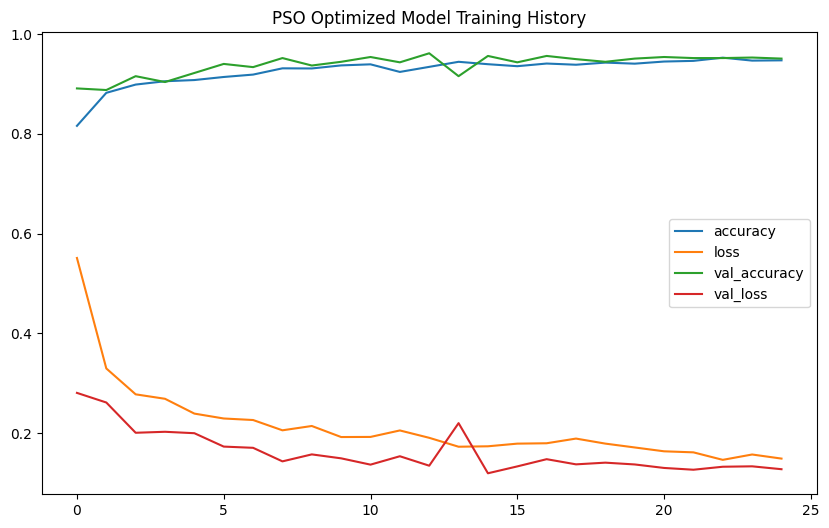


--- Evaluating PSO Optimized Model on Test Set ---

PSO Optimized Test Loss: 0.1873
PSO Optimized Test Accuracy: 0.9479
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

PSO Optimized Model Classification Report:
              precision    recall  f1-score   support

   Gas Giant       0.99      0.92      0.95       380
Neptune-like       0.96      0.96      0.96       400
 Super Earth       0.92      0.98      0.95       348
 Terrestrial       0.80      0.84      0.82        43

    accuracy                           0.95      1171
   macro avg       0.92      0.92      0.92      1171
weighted avg       0.95      0.95      0.95      1171



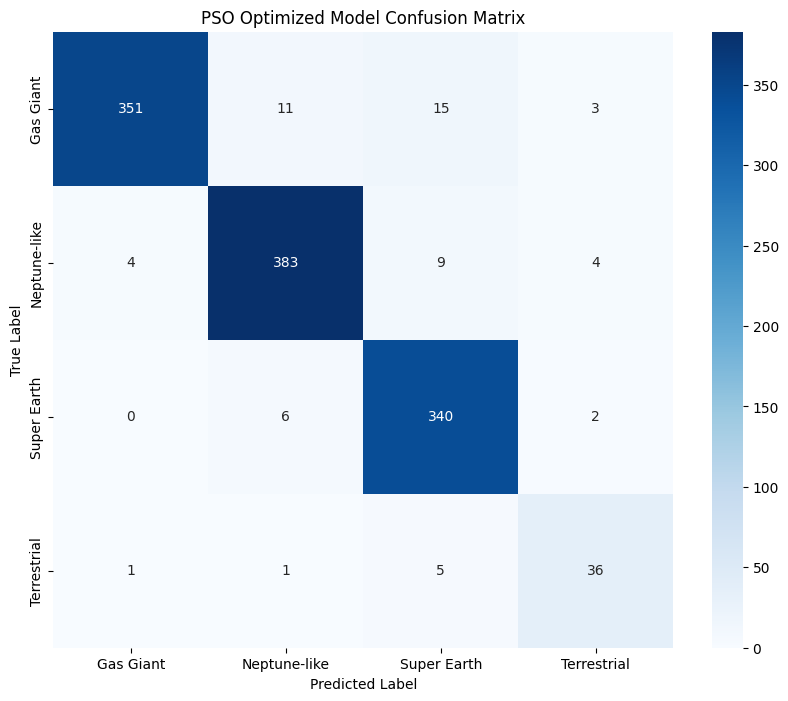


--- Comparison ---


NameError: name 'suboptimal_accuracy_value' is not defined

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import pyswarms as ps

try:
  catalog = pd.read_csv('/content/drive/MyDrive/VI/nasa_exoplanet_catalog_final.csv',sep=',')
except FileNotFoundError:
  print("CSV file not found. Please check path to CSV.")
  try:
    catalog = pd.read_csv('nasa_exoplanet_catalog_final.csv',sep=';')
  except:
    print("Fallback back also failed. Exiting.")
    exit()

#--1 General info

print("\n--- 1. Initial Inspection ---")


df_processed = catalog.copy()
cols_to_convert_to_numeric = ['mass', 'planet_radius', 'orbit_distance', 'eccentricity']
missing_value_placeholders = ['Not Found', 'Unknown', '', ' ']

print(f"\nConverting columns {cols_to_convert_to_numeric} to numeric and replacing placeholders {missing_value_placeholders} with NaN.")
for col in cols_to_convert_to_numeric:
    if col in df_processed.columns:
        # Replace string placeholders with NaN
        for placeholder in missing_value_placeholders:
            df_processed[col] = df_processed[col].replace(placeholder, np.nan)
        # Attempt to convert to numeric, errors='coerce' will turn unconvertible values into NaN
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
    else:
        print(f"Warning: Column {col} not found for numeric conversion.")

print("\nData Info after numeric conversion attempt:")
df_processed.info()

print("\nDescriptive Statistics (Numerical):")
print(df_processed.describe())

print("\nDescriptive Statistics (Categorical/Object):")
print(df_processed.describe(include='object'))

##--2 Handle missing values

print("\n--- 2. Handle missing values ---")

# Strategy:
# - For the target 'planet_type', rows with missing values are often dropped.
# - For numerical features, impute with median (less sensitive to outliers than mean).
# - For categorical features, impute with mode or a placeholder like 'Unknown'.
# - Drop columns with a very high percentage of missing values if they aren't critical.

cols_to_drop_identifiers = ['name', 'host_star_name', 'url']
df_processed.drop(columns=cols_to_drop_identifiers, inplace=True, errors='ignore')
print(f"\nDropped identifier columns: {cols_to_drop_identifiers}")

for placeholder in missing_value_placeholders:
    if 'planet_type' in df_processed.columns:
        df_processed['planet_type'] = df_processed['planet_type'].replace(placeholder, np.nan)

if 'planet_type' in df_processed.columns and df_processed['planet_type'].isnull().any():
    print(f"\nFound {df_processed['planet_type'].isnull().sum()} missing values in target 'planet_type'. Dropping these rows.")
    df_processed.dropna(subset=['planet_type'], inplace=True)
    print(f"New shape after dropping rows with missing target: {df_processed.shape}")
elif 'planet_type' not in df_processed.columns:
    print("Error: Target column 'planet_type' not found in the processed dataframe.")

print("\nFirst 5 rows of df_processed (to inspect data):")
print(df_processed.head())
print("\nLast 5 rows of df_processed (to inspect data):")
print(df_processed.tail())

print("\n--- 3. Exploratory Data Analysis (Brief) ---")
if 'planet_type' in df_processed.columns:
    print("\nValue counts for planet_type:")
    print(df_processed['planet_type'].value_counts())
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_processed['planet_type'], order=df_processed['planet_type'].value_counts().index)
    plt.title('Distribution of Planet Types (Target Variable)')
    plt.show()

print("\n--- 4. Preprocessing ---")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = df_processed.drop('planet_type', axis=1)
y = df_processed['planet_type']

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Impute missing numerical values with median
    ('scaler', StandardScaler())                   # Scale numerical features
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing cat values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # OHE, ignore unknown categories in test
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)
print(f"\nShape of X_processed: {X_processed.shape}")

try:
    ohe_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
    all_feature_names = numerical_features + list(ohe_feature_names)
    print(f"Number of features after OHE: {len(all_feature_names)}")
    print(f"Feature names: {all_feature_names[:10]}...") # Print a few
except Exception as e:
    print(f"Could not get OHE feature names: {e}")
    all_feature_names = None

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)
print(f"\nTarget variable '{y.name}' encoded.")
print(f"Number of unique classes: {num_classes}")
print(f"Class mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

print("\n--- 5. Train Test Split ---")

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"X_train_full shape: {X_train_full.shape}, y_train_full shape: {y_train_full.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

input_dim = X_train_full.shape[1]

print("\n--- Phase 2: Building a baseline Neural Network for later optimization---")

print("\n--- 6. Define the Neural Network Architecture ---")

model = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dropout(0.1), # Dropout for regularization
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(num_classes, activation='softmax')
])

print("\n--- 7. Compile the Model ---")
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

print("\n--- 8. Train the Model ---")
# Early stopping to prevent overfitting and find optimal epochs
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5, # Number of epochs with no improvement after which training will be stopped.
    restore_best_weights=True # Restores model weights from the epoch with the best value of the monitored quantity.
)

history = model.fit(
    X_train_full, y_train_full,
    epochs=50, # Max epochs
    batch_size=32,
    validation_split=0.2, # Use part of training data as validation
    callbacks=[early_stopping],
    verbose=1
)

# Plot training history
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.title("Model Training History")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.ylim(0, max(1, np.max(history.history['loss']), np.max(history.history['accuracy'])))
plt.grid(True)
plt.show()

print("\n--- 9. Evaluate the Model ---")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Classification Report
print("\nClassification Report:")
target_names_for_report = label_encoder.classes_
unique_labels_in_test_pred = np.unique(np.concatenate((y_test, y_pred)))
filtered_target_names = [target_names_for_report[i] for i in unique_labels_in_test_pred if i < len(target_names_for_report)]


try:
    print(classification_report(y_test, y_pred, target_names=filtered_target_names, labels=unique_labels_in_test_pred, zero_division=0))
except ValueError as e:
    print(f"Error in classification_report: {e}. Using default labels.")
    print(classification_report(y_test, y_pred, zero_division=0))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=unique_labels_in_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=filtered_target_names,
            yticklabels=filtered_target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# --- PSO Optimization Section ---
print("\n--- PSO Optimization ---")

# 1. Further split X_train_full for PSO's internal training and validation
X_train_pso, X_val_pso, y_train_pso, y_val_pso = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=123, stratify=y_train_full
)
print(f"PSO training set size: {X_train_pso.shape}")
print(f"PSO validation set size: {X_val_pso.shape}")


# 2. Define Hyperparameter Search Space for PSO
# [neurons_l1, neurons_l2, dropout_rate, learning_rate, batch_size]
min_bounds_pso = np.array([16,  8, 0.05, 0.0001, 16]) # Adjusted dropout_rate min
max_bounds_pso = np.array([128, 64, 0.5, 0.01,   64])
bounds_pso = (min_bounds_pso, max_bounds_pso)
n_dimensions_pso = len(min_bounds_pso)

# 3. Define PSO Objective Function
pso_iteration_count = 0
def nn_fitness_function_pso(params):
    global pso_iteration_count
    pso_iteration_count += 1

    neurons_l1 = int(round(params[0]))
    neurons_l2 = int(round(params[1]))
    dropout_rate_val = float(params[2])
    learning_rate_val = float(params[3])
    batch_size_val = int(round(params[4]))

    print(f"PSO Eval {pso_iteration_count}: N1={neurons_l1}, N2={neurons_l2}, DR={dropout_rate_val:.3f}, LR={learning_rate_val:.5f}, BS={batch_size_val}", end="")

    model_pso = Sequential([
        Dense(neurons_l1, activation='relu', input_shape=(input_dim,)),
        Dropout(dropout_rate_val),
        Dense(neurons_l2, activation='relu'),
        Dropout(dropout_rate_val),
        Dense(num_classes, activation='softmax')
    ])
    optimizer_pso_nn = Adam(learning_rate=learning_rate_val)
    model_pso.compile(optimizer=optimizer_pso_nn, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Short training for PSO evaluation
    early_stop_pso_eval = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=0)
    history_pso_eval = model_pso.fit(X_train_pso, y_train_pso,
                                     epochs=20, # Reduced epochs for PSO evaluation
                                     batch_size=batch_size_val,
                                     validation_data=(X_val_pso, y_val_pso),
                                     callbacks=[early_stop_pso_eval],
                                     verbose=0)

    val_accuracy = np.max(history_pso_eval.history['val_accuracy'])
    print(f" -> Val Acc: {val_accuracy:.4f}")
    return 1.0 - val_accuracy # pyswarms minimizes

def pso_objective_function_batch_wrapper(particles_batch):
    results = [nn_fitness_function_pso(p) for p in particles_batch]
    return np.array(results)

# 4. Configure and Run PSO
n_particles_pso = 10
pso_iters = 10
options_pso = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

print(f"\nStarting PSO with {n_particles_pso} particles for {pso_iters} iterations.")
pso_optimizer = ps.single.GlobalBestPSO(n_particles=n_particles_pso,
                                        dimensions=n_dimensions_pso,
                                        options=options_pso,
                                        bounds=bounds_pso)

best_cost_pso, best_params_pso = pso_optimizer.optimize(pso_objective_function_batch_wrapper, iters=pso_iters, verbose=True)

print("\n--- PSO Optimization Finished ---")
print(f"Best cost (1 - val_accuracy) from PSO: {best_cost_pso:.4f}")
print(f"Best hyperparameters from PSO: {best_params_pso}")

# Format best hyperparameters
best_neurons_l1 = int(round(best_params_pso[0]))
best_neurons_l2 = int(round(best_params_pso[1]))
best_dropout_rate = float(best_params_pso[2])
best_learning_rate = float(best_params_pso[3])
best_batch_size = int(round(best_params_pso[4]))

print("\nFormatted Best Hyperparameters from PSO:")
print(f"  Neurons L1: {best_neurons_l1}, Neurons L2: {best_neurons_l2}")
print(f"  Dropout: {best_dropout_rate:.4f}, LR: {best_learning_rate:.6f}, Batch Size: {best_batch_size}")

# 5. Train Final Model with PSO-Optimized Hyperparameters
print("\n--- Training Final Model with PSO-Optimized Hyperparameters ---")
final_model_pso = Sequential([
    Dense(best_neurons_l1, activation='relu', input_shape=(input_dim,)),
    Dropout(best_dropout_rate),
    Dense(best_neurons_l2, activation='relu'),
    Dropout(best_dropout_rate),
    Dense(num_classes, activation='softmax')
])
final_optimizer_pso = Adam(learning_rate=best_learning_rate)
final_model_pso.compile(optimizer=final_optimizer_pso, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
final_model_pso.summary()

early_stopping_final_pso = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # More patient
history_final_pso = final_model_pso.fit(
    X_train_full, y_train_full, # Train on the full training data
    epochs=100,                 # More epochs for final model
    batch_size=best_batch_size,
    validation_split=0.2,       # Validate on a split of the full training data
    callbacks=[early_stopping_final_pso],
    verbose=1
)

# Plot training history
pd.DataFrame(history_final_pso.history).plot(figsize=(10, 6))
plt.title("PSO Optimized Model Training History")
plt.show()

# Evaluate Final PSO Model on Test Set
print("\n--- Evaluating PSO Optimized Model on Test Set ---")
loss_final_pso, accuracy_final_pso = final_model_pso.evaluate(X_test, y_test, verbose=0)
print(f"\nPSO Optimized Test Loss: {loss_final_pso:.4f}")
print(f"PSO Optimized Test Accuracy: {accuracy_final_pso:.4f}")

# Classification Report and Confusion Matrix for PSO Model
y_pred_probs_final_pso = final_model_pso.predict(X_test)
y_pred_final_pso = np.argmax(y_pred_probs_final_pso, axis=1)

print("\nPSO Optimized Model Classification Report:")
target_names_report_pso = label_encoder.classes_
unique_labels_pso = np.unique(np.concatenate((y_test, y_pred_final_pso)))
filtered_target_names_pso = [target_names_report_pso[i] for i in unique_labels_pso if i < len(target_names_report_pso)]
try:
    print(classification_report(y_test, y_pred_final_pso, target_names=filtered_target_names_pso, labels=unique_labels_pso, zero_division=0))
except ValueError as e:
    print(f"Error in PSO classification_report: {e}. Using default labels.")
    print(classification_report(y_test, y_pred_final_pso, zero_division=0))

cm_final_pso = confusion_matrix(y_test, y_pred_final_pso, labels=unique_labels_pso)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_final_pso, annot=True, fmt='d', cmap='Blues',
            xticklabels=filtered_target_names_pso, yticklabels=filtered_target_names_pso)
plt.title('PSO Optimized Model Confusion Matrix')
plt.xlabel('Predicted Label'); plt.ylabel('True Label')
plt.show()

print("\n--- Comparison ---")
print(f"Suboptimal Model Test Accuracy: {suboptimal_accuracy_value*100:.2f}%")
print(f"PSO Optimized Model Test Accuracy: {accuracy_final_pso*100:.2f}%")

